
---
# 2. Limpieza y Preprocesamiento de Datos - Consumo Energía Renovable EE.UU.
---
## Objetivos del Notebook
* Corregir tipos de datos (datetime, numéricos, categóricos).
* Manejar valores especiales (ceros) y valores faltantes (NaNs).
* Realizar validaciones de consistencia.
* Guardar el dataset limpio y procesado para análisis posteriores.

## 2.1. Configuración del Entorno

* Importación de librerías (pandas, numpy).

In [6]:
import pandas as pd
import numpy as np
import os
import sys
import missingno as msno
import matplotlib.pyplot as plt

* Definición de rutas (datos crudos de entrada, datos procesados de salida).

In [7]:
# Definiendo el path o ruta hacia el dataset original
data_path = os.path.join('..', 'data', '01_raw', 'US_Renewable_Energy_Consumption.csv')
# Comprobando si el archivo existe
if not os.path.exists(data_path):
    print(f"El archivo {data_path} no existe.")
    sys.exit(1)

* Carga del dataset crudo.

In [8]:
# Cargando el dataset original
df = pd.read_csv(data_path, sep=',', encoding='utf-8', low_memory=False)

## 2.2. Corrección de Tipos de Datos

* Se Elimina el año `2024` ya que posee un unico dato, lo cual se presenta como un atipico para el análisis.

In [9]:
df = df[df['Year'] != 2024]
df.tail()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
3055,2023,12,Commerical,0.000,1.673,3.913,0.037,7.003,6.396,2.653,0.000,16.051,21.739,0.000,0.000,0.00,0.000
3056,2023,12,Electric Power,0.000,4.821,31.162,130.846,11.910,15.135,0.000,0.000,27.044,259.513,0.000,0.000,65.64,0.000
3057,2023,12,Industrial,0.269,0.357,0.942,0.037,104.598,14.357,1.666,74.073,194.694,196.299,0.000,0.000,0.00,0.000
3058,2023,12,Residential,0.000,3.363,14.658,0.000,38.247,0.000,0.000,0.000,0.000,56.268,0.000,0.000,0.00,0.000
3059,2023,12,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,93.570,0.000,156.234,0.000,38.344,4.101,0.00,20.219


* Combinar `Year` y `Month` en una columna `datetime`.

In [10]:
# Se combinan las columnas 'Year' y 'Month' para crear una nueva columna 'Datetime' si no existe
if 'Datetime' not in df.columns:
    # Comprobando si las columnas 'Year' y 'Month' existen en el DataFrame
    if 'Year' in df.columns and 'Month' in df.columns:
        # Combinando columnas de Year y Month para crear una nueva columna 'Datetime'
        df['Datetime'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
        # eliminando las columnas 'Year' y 'Month'
        df.drop(['Year', 'Month'], axis=1, inplace=True)  # Eliminando las columnas 'Year' y 'Month'
        # Se establece la columna 'Datetime' como índice del DataFrame
        df.set_index('Datetime', inplace=True)  # Estableciendo la columna 'Datetime' como índice del DataFrame
        df.sort_index(inplace=True) # Ordenando el DataFrame por la columna 'Datetime'
# Comprobando la información del dataset
df.head(10)  # Información general del dataset

,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
Datetime,,,,,,,,,,,,,,,
1973-01-01,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1973-01-01,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
1973-01-01,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
1973-01-01,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
1973-01-01,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0
1973-02-01,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0
1973-02-01,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0
1973-02-01,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0
1973-02-01,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0


* Convertir columna `Sector` a tipo `category`.

In [11]:
# se convierten la columna 'Sector' a tipo categórico
df['Sector'] = df['Sector'].astype('category')  # Convertir la columna 'Sector' a tipo categórico
# se verifica si la columna 'Sector' es de tipo categórico
df.dtypes  # Verificar el tipo de dato de la columna 'Sector'

Sector                                category
Hydroelectric Power                    float64
Geothermal Energy                      float64
Solar Energy                           float64
Wind Energy                            float64
Wood Energy                            float64
Waste Energy                           float64
Fuel Ethanol, Excluding Denaturant     float64
Biomass Losses and Co-products         float64
Biomass Energy                         float64
Total Renewable Energy                 float64
Renewable Diesel Fuel                  float64
Other Biofuels                         float64
Conventional Hydroelectric Power       float64
Biodiesel                              float64
dtype: object

## 2.4. Manejo de Valores Especiales (Ceros como Nulos)

* Identificar columnas de consumo de energía.

In [12]:
# Define las columnas de consumo
consumption_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Wood Energy', 'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant','Biomass Losses and Co-products',
    'Biomass Energy', 'Total Renewable Energy','Renewable Diesel Fuel',
    'Other Biofuels','Conventional Hydroelectric Power', 'Biodiesel'
]
consumption_columns 

['Hydroelectric Power',
 'Geothermal Energy',
 'Solar Energy',
 'Wind Energy',
 'Wood Energy',
 'Waste Energy',
 'Fuel Ethanol, Excluding Denaturant',
 'Biomass Losses and Co-products',
 'Biomass Energy',
 'Total Renewable Energy',
 'Renewable Diesel Fuel',
 'Other Biofuels',
 'Conventional Hydroelectric Power',
 'Biodiesel']

* Reemplazar valores `0` por `np.nan` en estas columnas, justificando según la descripción del dataset.

In [13]:
# Reemplaza 0 con NaN en esas columnas
df[consumption_columns] = df[consumption_columns].replace(0, np.nan)

* Verificar la conversión (ej. `df[consumption_cols].isnull().sum()`).

In [14]:
# Verifica el cambio
print("Conteo de NaNs por columna después del reemplazo:")
print(df[consumption_columns].isnull().sum())

Conteo de NaNs por columna después del reemplazo:
Hydroelectric Power                   2037
Geothermal Energy                     1188
Solar Energy                          1329
Wind Energy                           2272
Wood Energy                            612
Waste Energy                          1512
Fuel Ethanol, Excluding Denaturant    1512
Biomass Losses and Co-products        2544
Biomass Energy                         708
Total Renewable Energy                 612
Renewable Diesel Fuel                 2904
Other Biofuels                        2940
Conventional Hydroelectric Power      2448
Biodiesel                             2784
dtype: int64


* Guardado de Dataset intermediario

In [15]:
# Se guarda el Dataset intermedio en la carpeta 02_intermediate
intermediate_path = os.path.join('..', 'data', '02_intermediate')
if not os.path.exists(intermediate_path):
    os.makedirs(intermediate_path)  # Crear la carpeta si no existe
# Se guarda el DataFrame intermedio en un archivo CSV
df.to_csv(os.path.join(intermediate_path, 'US_Renewable_Energy_Consumption_Intermediate.csv'), index=True, encoding='utf-8')

## 2.5. Análisis y Tratamiento de Valores Faltantes (NaNs)

Tal y como se especifica en el Dataset descargado, es importante considerar que los valores correspondientes a 0, no corresponden a consumos reales, si no mas bíen corresponden a datos faltantes que pueden ser no existentes o reportados a la fecha, para una mejor interpretación de la base de datos y para no realizar el analisis con información incorrecta, estos valores se deben tomar como NaN (No a Number), y luego de esto se excluiran del analisis y se justificará esta acción en base de acuerdo a algún acontecimiento historico de ser posible.

* Visualizar patrones de valores faltantes (`missingno` library).

c:\Users\acer\OneDrive\Escritorio\Topicos_especiales_ii\us_renewable_energy_analysis\venv\Lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


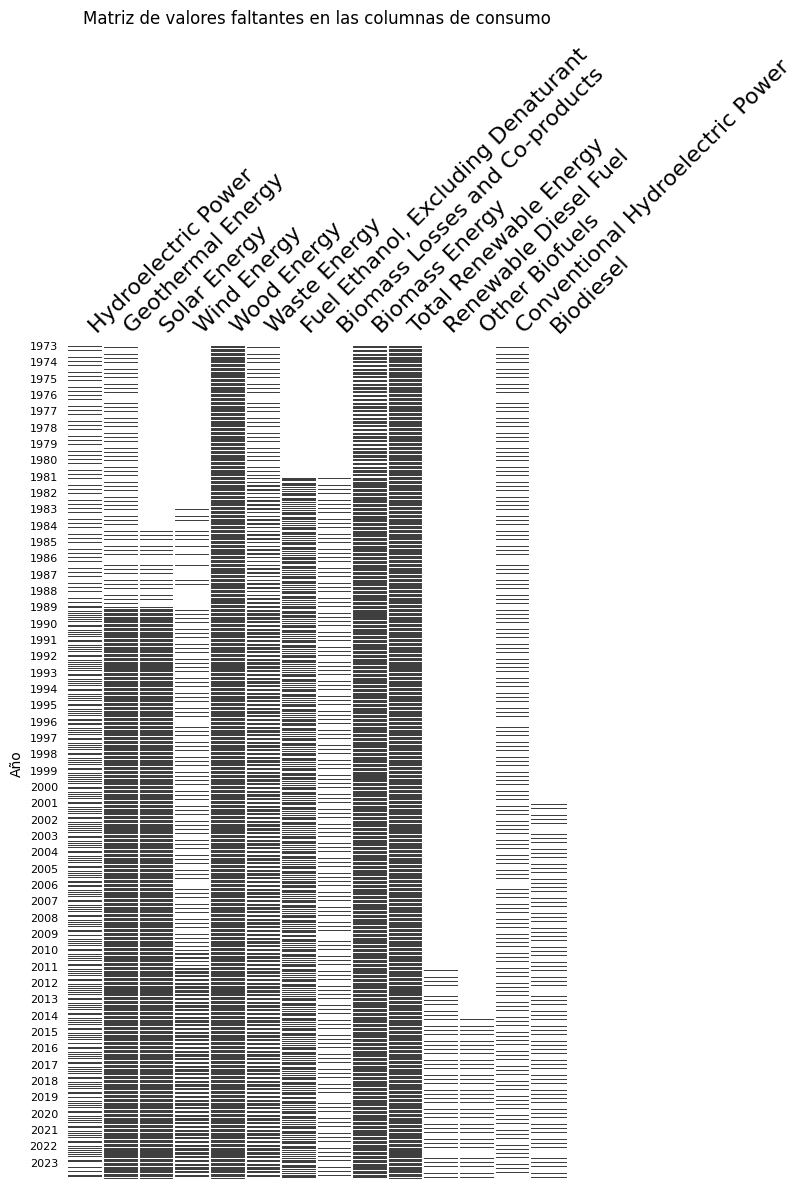

In [16]:
#  Dibuja la matriz de missing values
fig, ax = plt.subplots(figsize=(8, 12))
msno.matrix(df[consumption_columns], ax=ax)

# Calcula posiciones buscando la primera fila para cada 1-enero
positions = []
labels    = []
years = range(1973, 2025)
for y in years:
    ts = pd.Timestamp(f'{y}-01-01')
    # obtén todas las posiciones donde el índice == ts
    locs = np.where(df.index == ts)[0]
    if locs.size > 0:
        positions.append(locs[0])  # primeras aparición
        labels.append(y)

# 4) Fija ticks y etiquetas
ax.set_yticks(positions)
ax.set_yticklabels(labels, fontsize=8, rotation=0, va='center')

# 5) Invierte el eje Y
ax.set_ylim(len(df), 0)

# 6) Ajustes finales
ax.set_ylabel('Año', fontsize=10)
ax.set_title('Matriz de valores faltantes en las columnas de consumo', pad=15)
plt.tight_layout()
plt.show()



#### **Hallazgo Notable**

En la gráfica de la matriz de valores faltantes, se aprecia que las energías provenientes de Energía de residuos, Energía Solar,Energía Eólica, Bioetanol, Biomasa y derivados, etc, presentan información a partir de ciertos años en adelante, esto puede ser debido a que estas tecnológias para la generación de energía se fueron desarrollando e implementado en los últimos años, por lo que a partir de 1973 solo existe información de las fuentes convencionales de energía.

* Imputación de Datos

In [17]:
# 1. Crear una copia para no modificar el df original directamente en este paso exploratorio
df_imputed = df.copy()

# 2. Iterar por cada columna de consumo
for column in consumption_columns:
    # Encontrar el índice (fecha) de la primera observación válida (no NaN)
    first_valid_index = df_imputed[column].first_valid_index()

    if first_valid_index is not None:
        # Si hay al menos un valor válido en la columna:

        # a) Poner a CERO todos los valores ANTES de la primera observación válida real.
        # Esto corrige la interpolación que pudo haber rellenado NaNs al inicio de la serie donde la tecnología aún no existía o no se medía.
        df_imputed.loc[:first_valid_index, column] = df_imputed.loc[:first_valid_index, column].fillna(0)
        # Es importante el .fillna(0) anterior por si first_valid_index era el primer dato y no había nada que interpolar antes.
        # Y también, nos aseguramos que todo antes de la primera medición REAL sea cero.
        
        # b) Interpolar todo en la columna (esto llenará huecos INTERNOS)
        df_imputed.loc[first_valid_index:, column] = df_imputed.loc[first_valid_index:, column].interpolate(method='linear', limit_direction='both')
    else:
        # Si TODA la columna es NaN (ningún valor válido), puedes decidir rellenarla con 0 o dejarla como NaN, dependiendo de cómo quieras tratar una fuente sin datos.
        df_imputed[column] = df_imputed[column].fillna(0)
    
# Comprueba algunas columnas donde sabías que había muchos NaNs al principio, ej. 'Solar Energy'
print(df_imputed.loc['1973':'1985', ['Solar Energy', 'Wind Energy']]) # Revisa un rango específico
print(df_imputed.loc['1985':'2022', ['Solar Energy', 'Wind Energy']]) # Revisa un rango específico

            Solar Energy  Wind Energy
Datetime                             
1973-01-01        0.0000        0.000
1973-01-01        0.0000        0.000
1973-01-01        0.0000        0.000
1973-01-01        0.0000        0.000
1973-01-01        0.0000        0.000
...                  ...          ...
1985-12-01        0.0010        0.001
1985-12-01        0.0010        0.001
1985-12-01        0.0012        0.001
1985-12-01        0.0014        0.001
1985-12-01        0.0016        0.001

[780 rows x 2 columns]
            Solar Energy  Wind Energy
Datetime                             
1985-01-01      0.001900     0.002400
1985-01-01      0.002000     0.002000
1985-01-01      0.002133     0.002400
1985-01-01      0.002267     0.002800
1985-01-01      0.002400     0.003200
...                  ...          ...
2022-12-01      3.538000     0.051000
2022-12-01     22.980000   131.884000
2022-12-01      0.825000     0.040000
2022-12-01     12.314000     0.045333
2022-12-01      8.102000  

#### **Justificación de la imputación**

Para este caso, debido a un analisis realizado en la gráfica de la matriz de valores faltantes (NaNs), se determinó que los valores "no disponibles" previos a la aparición de cualquier valor válido de consumo en alguna fuente de energía renovable, se deben considerar como cero, esto debido a que se interpreta que en ese intervalo de tiempo la tecnológia no existía no se utilizaba, por lo que no se puede considerar como un valor faltante, sino como un valor cero. Por otro lado los valores "no disponibles" posteriores a la aparición de cualquier valor válido de consumo en alguna fuente de energía renovable, se deben imputar por medio de algún método, para este caso se eligío la interpolación como método apropiado debido a la tendencia de los datos.

* Confirmación de valores únicos por `Sector` o Categoria

In [18]:
df_imputed["Sector"].unique() # Verifica las categorías de la columna 'Sector'

['Commerical', 'Electric Power', 'Industrial', 'Residential', 'Transportation']
Categories (5, object): ['Commerical', 'Electric Power', 'Industrial', 'Residential', 'Transportation']

In [19]:
# Se cambia el nombre del Sector 'Commerical' a 'Commercial'
df_imputed['Sector'] = df_imputed['Sector'].replace('Commerical', 'Commercial')
# Se verifica el cambio
df_imputed['Sector'].unique()

C:\Users\acer\AppData\Local\Temp\ipykernel_9300\214120413.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_imputed['Sector'] = df_imputed['Sector'].replace('Commerical', 'Commercial')


['Commercial', 'Electric Power', 'Industrial', 'Residential', 'Transportation']
Categories (5, object): ['Commercial', 'Electric Power', 'Industrial', 'Residential', 'Transportation']

## 2.6. Guardado del Dataset Limpio

* Inspección final del DataFrame limpio (`df_clean.head()`, `df_clean.info()`).

In [20]:
# Se realiza una inspección visual de los datos imputados
df_imputed.head() # Muestra las primeras filas del DataFrame imputado para verificar los cambios

,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
Datetime,,,,,,,,,,,,,,,
1973-01-01,Commercial,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1973-01-01,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
1973-01-01,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
1973-01-01,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
1973-01-01,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [21]:
# Se verifica la información del dataset imputado.
df_imputed.info() # Información general del dataset imputado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3060 entries, 1973-01-01 to 2023-12-01
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Sector                              3060 non-null   category
 1   Hydroelectric Power                 3060 non-null   float64 
 2   Geothermal Energy                   3060 non-null   float64 
 3   Solar Energy                        3060 non-null   float64 
 4   Wind Energy                         3060 non-null   float64 
 5   Wood Energy                         3060 non-null   float64 
 6   Waste Energy                        3060 non-null   float64 
 7   Fuel Ethanol, Excluding Denaturant  3060 non-null   float64 
 8   Biomass Losses and Co-products      3060 non-null   float64 
 9   Biomass Energy                      3060 non-null   float64 
 10  Total Renewable Energy              3060 non-null   float64 
 11  Renewable Di

* Guardar en formato eficiente (ej. Parquet) en `data/03_processed/`.

In [22]:
# Se guarda el DataFrame procesado o limpio en un archivo CSV
processed_path = os.path.join('..', 'data', '03_processed')
if not os.path.exists(processed_path):
    os.makedirs(processed_path)  # Crear la carpeta si no existe
# Se guarda el DataFrame limpio en un archivo CSV
df_imputed.to_csv(os.path.join(processed_path, 'US_Renewable_Energy_Consumption_Cleaned.csv'), index=True, encoding='utf-8')

